In [1]:
import os
import glob
from osgeo import gdal
import rasterio
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Reading Images
image_names = glob.glob(r'Test Data/Images/*.tif')
print(image_names)

['Test Data/Images/img1043.tif', 'Test Data/Images/img138.tif', 'Test Data/Images/img559.tif', 'Test Data/Images/img588.tif', 'Test Data/Images/img377.tif', 'Test Data/Images/img716.tif', 'Test Data/Images/img401.tif', 'Test Data/Images/img873.tif', 'Test Data/Images/img144.tif', 'Test Data/Images/img282.tif', 'Test Data/Images/img46.tif', 'Test Data/Images/img957.tif', 'Test Data/Images/img525.tif', 'Test Data/Images/img253.tif', 'Test Data/Images/img986.tif', 'Test Data/Images/img97.tif', 'Test Data/Images/img632.tif', 'Test Data/Images/img195.tif', 'Test Data/Images/img143.tif', 'Test Data/Images/img1038.tif', 'Test Data/Images/img41.tif', 'Test Data/Images/img522.tif', 'Test Data/Images/img950.tif', 'Test Data/Images/img285.tif', 'Test Data/Images/img981.tif', 'Test Data/Images/img90.tif', 'Test Data/Images/img254.tif', 'Test Data/Images/img192.tif', 'Test Data/Images/img635.tif', 'Test Data/Images/img808.tif', 'Test Data/Images/img698.tif', 'Test Data/Images/img1044.tif', 'Test Da

In [3]:
image_names.sort()
print(image_names)

['Test Data/Images/img1.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img100.tif', 'Test Data/Images/img1000.tif', 'Test Data/Images/img1001.tif', 'Test Data/Images/img1002.tif', 'Test Data/Images/img1003.tif', 'Test Data/Images/img1004.tif', 'Test Data/Images/img1005.tif', 'Test Data/Images/img1006.tif', 'Test Data/Images/img1007.tif', 'Test Data/Images/img1008.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img101.tif', 'Test Data/Images/img1010.tif', 'Test Data/Images/img1011.tif', 'Test Data/Images/img1012.tif', 'Test Data/Images/img1013.tif', 'Test Data/Images/img1014.tif', 'Test Data/Images/img1015.tif', 'Test Data/Images/img1016.tif', 'Test Data/Images/img1017.tif', 'Test Data/Images/img1018.tif', 'Test Data/Images/img1019.tif', 'Test Data/Images/img102.tif', 'Test Data/Images/img1020.tif', 'Test Data/Images/img1021.tif', 'Test Data/Images/img1022.tif', 'Test Data/Images/img1023.tif', 'Test Data/Images/img1024.tif', 'Test Data/Images/img1025.tif', 'Test Data/Imag

In [4]:
print(len(image_names))

1080


In [5]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [6]:
image_dataset = np.array(images_names_)

In [7]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='int8')

In [8]:
image_dataset_

array([[[[ -72,  -96, -104, ...,  -73,  -63,  -64],
         [-106,  -83,  -92, ...,  -55,  -58,  -61],
         [-115,  -86,  -69, ...,  -59,  -61,  -60],
         ...,
         [-114, -116, -115, ..., -120, -118, -117],
         [-116, -115, -115, ..., -118, -117, -118],
         [-117, -113, -116, ..., -118, -118, -118]],

        [[ -82, -103, -111, ..., -106, -100, -102],
         [-114,  -91,  -99, ...,  -88,  -96,  -99],
         [-123,  -95,  -78, ...,  -93,  -98,  -98],
         ...,
         [-124, -126, -125, ..., -127, -124, -124],
         [-126, -126, -126, ..., -124, -123, -125],
         [-127, -123, -126, ..., -125, -124, -125]],

        [[ -83, -104, -112, ..., -106, -100, -104],
         [-116,  -92, -100, ...,  -89,  -97, -101],
         [-123,  -95,  -78, ...,  -93, -100, -101],
         ...,
         [ 126,  124,  125, ...,  126, -128, -128],
         [ 123,  125,  125, ..., -128, -127,  127],
         [ 123,  126,  124, ..., -128, -128,  127]],

        [[  69, 

In [9]:
image_dataset_.shape

(1080, 5, 512, 512)

In [10]:
image_dataset_.dtype

dtype('int8')

In [11]:
#Reading Masks

mask_names = glob.glob(r'Test Data/masks/*.tif')
print(mask_names)

['Test Data/masks/mask545.tif.tif', 'Test Data/masks/mask492.tif.tif', 'Test Data/masks/mask277.tif.tif', 'Test Data/masks/mask350.tif.tif', 'Test Data/masks/mask287.tif.tif', 'Test Data/masks/mask628.tif.tif', 'Test Data/masks/mask462.tif.tif', 'Test Data/masks/mask354.tif.tif', 'Test Data/masks/mask466.tif.tif', 'Test Data/masks/mask283.tif.tif', 'Test Data/masks/mask541.tif.tif', 'Test Data/masks/mask848.tif.tif', 'Test Data/masks/mask273.tif.tif', 'Test Data/masks/mask496.tif.tif', 'Test Data/masks/mask624.tif.tif', 'Test Data/masks/mask23.tif.tif', 'Test Data/masks/mask116.tif.tif', 'Test Data/masks/mask967.tif.tif', 'Test Data/masks/mask2.tif.tif', 'Test Data/masks/mask840.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask703.tif.tif', 'Test Data/masks/mask549.tif.tif', 'Test Data/masks/mask997.tif.tif', 'Test Data/masks/mask6.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask844.tif.tif', 'Test Data/masks/mask993.tif.tif', 'Test Data/masks/mask7

In [12]:
mask_names.sort()
print(mask_names)

['Test Data/masks/mask1.tif.tif', 'Test Data/masks/mask10.tif.tif', 'Test Data/masks/mask100.tif.tif', 'Test Data/masks/mask1000.tif.tif', 'Test Data/masks/mask1001.tif.tif', 'Test Data/masks/mask1002.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask1004.tif.tif', 'Test Data/masks/mask1005.tif.tif', 'Test Data/masks/mask1006.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask1008.tif.tif', 'Test Data/masks/mask1009.tif.tif', 'Test Data/masks/mask101.tif.tif', 'Test Data/masks/mask1010.tif.tif', 'Test Data/masks/mask1011.tif.tif', 'Test Data/masks/mask1012.tif.tif', 'Test Data/masks/mask1013.tif.tif', 'Test Data/masks/mask1014.tif.tif', 'Test Data/masks/mask1015.tif.tif', 'Test Data/masks/mask1016.tif.tif', 'Test Data/masks/mask1017.tif.tif', 'Test Data/masks/mask1018.tif.tif', 'Test Data/masks/mask1019.tif.tif', 'Test Data/masks/mask102.tif.tif', 'Test Data/masks/mask1020.tif.tif', 'Test Data/masks/mask1021.tif.tif', 'Test Data/masks/mask1022.tif.tif',

In [13]:
print(len(mask_names))

1080


In [14]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [15]:
mask_dataset = np.array(mask_names_)

In [16]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'int8')

In [17]:
mask_dataset_

array([[[  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        ...,
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       ...,

       [[ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2

In [18]:
mask_dataset_.dtype

dtype('int8')

In [19]:
_mask_dataset_ = np.copy(mask_dataset_) #Make a copy

In [20]:
_mask_dataset_[_mask_dataset_ == -2] = 0

In [21]:
#Maximum and Minimum value in images
print(np.nanmax(image_dataset_))
print(np.nanmin(image_dataset_))

127
-128


In [22]:
#Maximum and Minimum value in Masks
print(np.nanmax(_mask_dataset_))
print(np.nanmin(_mask_dataset_))

127
0


In [23]:
#Labels in the mask are
np.unique(_mask_dataset_)

array([  0, 127], dtype=int8)

In [24]:
print(image_dataset_.shape)
print(_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512)


In [25]:
#Normalize images
new_image_dataset = image_dataset_ /127.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset = _mask_dataset_ /127.  #Pixel values will be 0 or 1

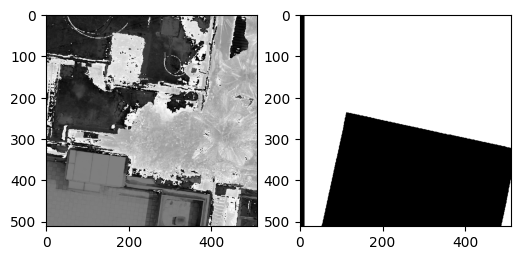

In [26]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(new_image_dataset))
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(new_image_dataset[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(new_mask_dataset[image_number], cmap='gray')
plt.show()

In [27]:
# Dimension expanding only for labels
# new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset_ = np.expand_dims(new_mask_dataset, axis = 3)

In [28]:
#Check shape of images and mask 
print(new_image_dataset.shape)
print(new_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512, 1)


In [29]:
#Maximum in image dataset and unique value in mask dataset after normalization 
print(np.nanmax(new_image_dataset))
print(np.nanmin(new_image_dataset))
print(np.unique(new_mask_dataset_))

1.0
-1.0078740157480315
[0. 1.]


In [30]:
print(new_image_dataset.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset, new_mask_dataset_, test_size = 0.30, random_state = 42)

In [33]:
#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(756, 5, 512, 512)
(756, 512, 512, 1)
(324, 5, 512, 512)
(324, 512, 512, 1)


In [34]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


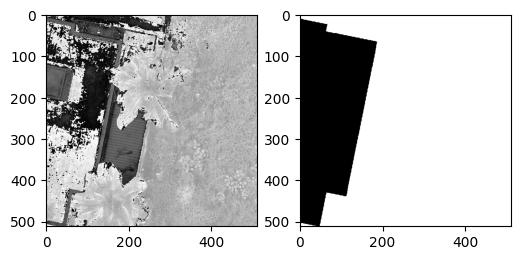

In [35]:
#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()
# plt.savefig("E://ss.png")

In [36]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1))
X_test_ = np.transpose(X_test, (0, 2, 3, 1))
print(X_train_.shape)
print(X_test_.shape)

(756, 512, 512, 5)
(324, 512, 512, 5)


In [37]:
#Unet Implementation
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

In [38]:
from keras.layers import Input
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape
from keras.models import Model

In [39]:
from tensorflow.keras.layers import Input, Conv2D, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [40]:
from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Layer
import argparse

In [41]:
from keras.applications import vgg16, inception_v3, mobilenet
from keras.preprocessing.image import ImageDataGenerator

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
#VGG16 model defined for 224x224,3 - like Original

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

# model = Sequential()

# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# # model.add(Flatten())
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=10, activation="softmax")) 

# print(model.summary())

In [ ]:
#VGG16 model defined for my shape 512x512x5 - which will have random weights

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# model = Sequential()

# model.add(Conv2D(input_shape=(512,512,5),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# # model.add(Flatten())
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=10, activation="softmax")) 

# print(model.summary())

In [43]:
#Let us import VGG16 model with imagenet weights from keras.

img1_shape = (224,224,3)
model_224 = VGG16(include_top=False, weights='imagenet', input_shape=img1_shape)
print(model_224.summary())
#plot_model(model_224, to_file='model_224.png', show_shapes=True, show_layer_names=True)


2022-12-26 08:18:16.044157: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#our multi channels, will throw an error
my_shape = (512,512,5)
model_512_5 = VGG16(include_top=False, weights='imagenet', input_shape=my_shape)
print(model_512_5.summary())

In [44]:
# Build VGG16 for 512 x 512 x 5 channels 

#Import vgg model by not defining an input shape. 
vgg_model = VGG16(include_top=False, weights='imagenet')
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [45]:
#Get the dictionary of config for vgg16
vgg_config = vgg_model.get_config()

In [46]:
# Change the input shape to new desired shape
h, w, c = 512, 512, 5
vgg_config["layers"][0]["config"]["batch_input_shape"] = (None, h, w, c)

In [47]:
#Create new model with the updated configuration
vgg_updated = Model.from_config(vgg_config)
print(vgg_updated.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [48]:
# Check Weights of first conv layer in the original model...
orig_model_conv1_block1_wts = vgg_model.layers[1].get_weights()[0]

print(orig_model_conv1_block1_wts[:,:,0,0])
print(orig_model_conv1_block1_wts[:,:,1,0])
print(orig_model_conv1_block1_wts[:,:,2,0])

[[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
[[ 0.55037946  0.44007453 -0.08138704]
 [ 0.34573907  0.04063221 -0.4535013 ]
 [-0.05863491 -0.33066967 -0.4850302 ]]
[[ 0.4800154   0.4085474  -0.06514555]
 [ 0.31047726  0.05020237 -0.40338343]
 [-0.05087169 -0.2852275  -0.41851634]]


In [49]:
# Check Weights of first conv layer in the new model...
new_model_conv1_block1_wts = vgg_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts[:,:,0,0])
print(new_model_conv1_block1_wts[:,:,1,0])
print(new_model_conv1_block1_wts[:,:,2,0])
print(new_model_conv1_block1_wts[:,:,3,0])
print(new_model_conv1_block1_wts[:,:,4,0])
#Random weights....

[[ 0.06301355 -0.06991469  0.08372036]
 [ 0.06024577  0.07303751  0.06098499]
 [ 0.04968185  0.04686194  0.09158941]]
[[ 0.09737464  0.0824093  -0.04946993]
 [ 0.02425279  0.06436016  0.03561199]
 [ 0.0378667  -0.02209123 -0.07628135]]
[[-0.00448807  0.06260835 -0.08714718]
 [ 0.00759403  0.02725256 -0.00044733]
 [ 0.08498392  0.09408747 -0.04131556]]
[[ 0.00391186  0.03773943 -0.06733681]
 [ 0.0250568  -0.08252887  0.06633974]
 [-0.00423379 -0.01668579 -0.05235357]]
[[-0.05866206 -0.09008282 -0.00292327]
 [ 0.02486428 -0.01881971  0.0310755 ]
 [-0.03686497 -0.01478044 -0.05955712]]


In [50]:
#New model created with updated input shape but weights are not copied from the original input.

#Since we have more channels to our input layer, we need to either randomly
#assign weights or get an average of all existing weights from the input layer
#and assign to the new channels as starting point. 
#Assigning average of weights may be a better approach.

In [50]:
# Function that calculates average of weights along the channel axis and then
#copies it over n number of times. n being the new channels that need to be concatenated with the original channels. 
def avg_and_copy_wts(weights, num_channels_to_fill):  #num_channels_to_fill are the extra channels for which we need to fill weights
    average_weights = np.mean(weights, axis=-2).reshape(weights[:,:,-1:,:].shape)  #Find mean along the channel axis (second to last axis)
    wts_copied_to_mult_channels = np.tile(average_weights, (num_channels_to_fill, 1)) #Repeat (copy) the array multiple times
    return(wts_copied_to_mult_channels)

In [51]:
#Get the configuration for the updated model and extract layer names. 
#We will use these names to copy over weights from the original model. 
vgg_updated_config = vgg_updated.get_config()
vgg_updated_layer_names = [vgg_updated_config['layers'][x]['name'] for x in range(len(vgg_updated_config['layers']))]

In [52]:
#Name of the first convolutional layer.
#Remember that this is the only layer with new additional weights. All other layers
#will have same weights as the original model. 
first_conv_name = vgg_updated_layer_names[1]
print(first_conv_name)

block1_conv1


In [53]:
#Update weights for all layers. And for the first conv layer, copy the first
#three layer weights and fill others with the average of all three. 
for layer in vgg_model.layers:
    if layer.name in vgg_updated_layer_names:
     
      if layer.get_weights() != []:  #All convolutional layers and layers with weights (no input layer or any pool layers)
        target_layer = vgg_updated.get_layer(layer.name)
    
        if layer.name in first_conv_name:    #For the first convolutionl layer
            weights = layer.get_weights()[0]
            biases  = layer.get_weights()[1]
    
            weights_extra_channels = np.concatenate((weights,   #Keep the first 3 channel weights as-is and copy the weights for additional channels.
                                                    avg_and_copy_wts(weights, c - 3)),  # - 3 as we already have weights for the 3 existing channels in our model. 
                                                    axis=-2)
                                                  
            target_layer.set_weights([weights_extra_channels, biases])  #Now set weights for the first conv. layer
            target_layer.trainable = False   #You can make this trainable if you want. 
    
        else:
            target_layer.set_weights(layer.get_weights())   #Set weights to all other layers. 
            target_layer.trainable = False  #You can make this trainable if you want. 

In [54]:
# Check Weights of first conv layer in the new model...
#Compare against the original model weights
new_model_conv1_block1_wts_updated = vgg_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts_updated[:,:,0,0])
print(new_model_conv1_block1_wts_updated[:,:,1,0])
print(new_model_conv1_block1_wts_updated[:,:,2,0])
print(new_model_conv1_block1_wts_updated[:,:,3,0])
print(new_model_conv1_block1_wts_updated[:,:,4,0])

[[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
[[ 0.55037946  0.44007453 -0.08138704]
 [ 0.34573907  0.04063221 -0.4535013 ]
 [-0.05863491 -0.33066967 -0.4850302 ]]
[[ 0.4800154   0.4085474  -0.06514555]
 [ 0.31047726  0.05020237 -0.40338343]
 [-0.05087169 -0.2852275  -0.41851634]]
[[ 0.48662183  0.40736297 -0.06929757]
 [ 0.31032872  0.04317178 -0.40803602]
 [-0.05565825 -0.29271564 -0.4178811 ]]
[[ 0.48662183  0.40736297 -0.06929757]
 [ 0.31032872  0.04317178 -0.40803602]
 [-0.05565825 -0.29271564 -0.4178811 ]]


In [55]:
print(vgg_updated.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [56]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Dropout(0.5)(x)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [57]:
def build_vgg16_unet(input_shape):
    """ Input """
    input_shape = vgg_updated.layers[-19].output
    inputs = input_shape
    
    """ Encoder from Pre-trained VGG16 updated Model """

    s1 = vgg_updated.get_layer("block1_conv2").output         ## (512 x 512)
    s2 = vgg_updated.get_layer("block2_conv2").output         ## (256 x 256)
    s3 = vgg_updated.get_layer("block3_conv3").output         ## (128 x 128)
    s4 = vgg_updated.get_layer("block4_conv3").output         ## (64 x 64)

    """ Bridge """
    b1 = vgg_updated.get_layer("block5_conv3").output         ## (32 x 32)
    
    """ Decoder """
    d1 = decoder_block(b1, s4, 128)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 64)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 32)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 16)                      ## (512 x 512)
    
    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
    
    model = Model(inputs = inputs, outputs = outputs, name = "VGG16_U-Net")
    return model

if __name__ == "__main__":
    input_shape = vgg_updated.layers[-19].output
    model = build_vgg16_unet(input_shape)
    model.summary()

Model: "VGG16_U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  2944        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                       

In [60]:
from keras.utils import plot_model

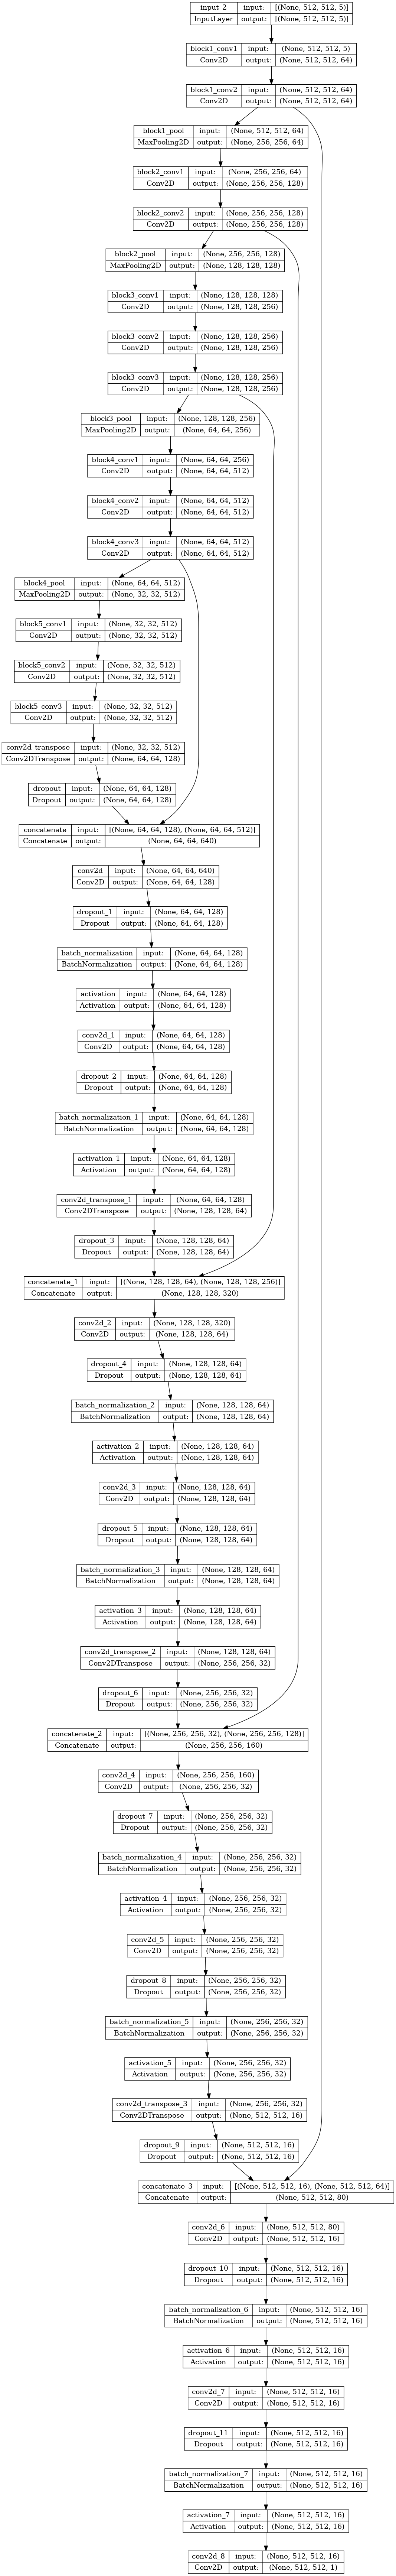

In [61]:
keras.utils.plot_model(model, "VGG16_U-Net_1.6Cr_TP.png", show_shapes=True)

In [135]:
pip install keras-lr-finder

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [58]:
# import math
# from keras.callbacks import LambdaCallback
# import keras.backend as K

In [ ]:
'''Method 1 - Finding optimal learning rate using LR finder'''

In [59]:
# from keras_lr_finder import LRFinder

In [60]:
# class LRFinder:
#     """
#     Learning rate range test detailed in Cyclical Learning Rates for Training
#     Neural Networks by Leslie N. Smith. The learning rate range test is a test
#     that provides valuable information about the optimal learning rate. During
#     a pre-training run, the learning rate is increased linearly or
#     exponentially between two boundaries. The low initial learning rate allows
#     the network to start converging and as the learning rate is increased it
#     will eventually be too large and the network will diverge.
#     """

#     def __init__(self, model):
#         self.model = model
#         self.losses = []
#         self.learning_rates = []
#         self.best_loss = 1e9

#     def on_batch_end(self, batch, logs):
#         lr = K.get_value(self.model.optimizer.lr)
#         self.learning_rates.append(lr)

#         loss = logs['loss']
#         self.losses.append(loss)

#         if batch > 5 and (math.isnan(loss) or loss > self.best_loss * 4):
#             self.model.stop_training = True
#             return

#         if loss < self.best_loss:
#             self.best_loss = loss

#         lr *= self.lr_mult
#         K.set_value(self.model.optimizer.lr, lr)

#     def find(self, dataset, start_lr, end_lr, epochs=1,
#              steps_per_epoch=None, **kw_fit):
#         if steps_per_epoch is None:
#             raise Exception('To correctly train on the datagenerator,'
#                             '`steps_per_epoch` cannot be None.'
#                             'You can calculate it as '
#                             '`np.ceil(len(TRAINING_LIST) / BATCH)`')

#         self.lr_mult = (float(end_lr) /
#                         float(start_lr)) ** (float(1) /
#                                              float(epochs * steps_per_epoch))
#         initial_weights = self.model.get_weights()

#         original_lr = K.get_value(self.model.optimizer.lr)
#         K.set_value(self.model.optimizer.lr, start_lr)

#         callback = LambdaCallback(on_batch_end=lambda batch,
#                                   logs: self.on_batch_end(batch, logs))

#         self.model.fit(dataset,
#                        epochs=epochs, callbacks=[callback], **kw_fit)
#         self.model.set_weights(initial_weights)

#         K.set_value(self.model.optimizer.lr, original_lr)

#     def get_learning_rates(self):
#         return(self.learning_rates)

#     def get_losses(self):
#         return(self.losses)

#     def get_derivatives(self, sma):
#         assert sma >= 1
#         derivatives = [0] * sma
#         for i in range(sma, len(self.learning_rates)):
#             derivatives.append((self.losses[i] - self.losses[i - sma]) / sma)
#         return derivatives

#     def get_best_lr(self, sma, n_skip_beginning=10, n_skip_end=5):
#         derivatives = self.get_derivatives(sma)
#         best_der_idx = np.argmin(derivatives[n_skip_beginning:-n_skip_end])
#         return self.learning_rates[n_skip_beginning:-n_skip_end][best_der_idx]

In [61]:
# "# Metrics"

# #f1, recall, precision metrics, and jacard coefficient

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def jacard_coef(y_true, y_pred):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [62]:
# #defining the batch size
# BATCH = 16

In [63]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_, y_train))
# train_ds = train_ds.shuffle(buffer_size=len(X_train_))
# train_ds = train_ds.batch(BATCH)
# train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

# test_ds = tf.data.Dataset.from_tensor_slices((X_test_, y_test))
# test_ds = test_ds.batch(BATCH)
# test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [64]:
# # compile keras model with defined optimizer, loss and metrics
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [65]:
# '''Find Learning Rate'''
# # Explore learning rate from start_lr to end_lr over five epochs
# STEPS_PER_EPOCH = np.ceil(len(X_train_) / BATCH)

In [66]:
# lr_finder = LRFinder(model)
# lr_finder.find(train_ds, start_lr=1e-6, end_lr=1, epochs=5,
#                steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/5
48/48 [==============================] - 1829s 38s/step - loss: 0.7507 - acc: 0.4895 - f1_m: 0.5420 - precision_m: 0.5082 - recall_m: 0.5904 - jacard_coef: 0.3525
Epoch 2/5
48/48 [==============================] - 2153s 45s/step - loss: 0.7346 - acc: 0.5128 - f1_m: 0.5504 - precision_m: 0.5239 - recall_m: 0.5881 - jacard_coef: 0.3546
Epoch 3/5
48/48 [==============================] - 1885s 39s/step - loss: 0.6635 - acc: 0.6174 - f1_m: 0.6172 - precision_m: 0.6368 - recall_m: 0.6053 - jacard_coef: 0.3880
Epoch 4/5
48/48 [==============================] - 1750s 36s/step - loss: 0.6233 - acc: 0.6669 - f1_m: 0.7002 - precision_m: 0.6548 - recall_m: 0.7617 - jacard_coef: 0.4094
Epoch 5/5
48/48 [==============================] - 1581s 33s/step - loss: 0.6610 - acc: 0.6314 - f1_m: 0.6518 - precision_m: 0.6326 - recall_m: 0.7588 - jacard_coef: 0.3971


In [67]:
# # Plot the loss curve and smooth it out with Simple Moving Average. 
# # The best learning rate is a value that is approximately in the middle of the sharpest downward slope.

# def plot_loss(n_skip_beginning=10, n_skip_end=5, x_scale='log'):
#     """
#     Plots the loss.
#     Parameters:
#         n_skip_beginning - number of batches to skip on the left.
#         n_skip_end - number of batches to skip on the right.
#         """
#     learning_rates = lr_finder.get_learning_rates()
#     losses = lr_finder.get_losses()

#     f, ax = plt.subplots()
#     ax.set_ylabel("loss")
#     ax.set_xlabel("learning rate (log scale)")
#     ax.plot(learning_rates[n_skip_beginning:-n_skip_end],
#             losses[n_skip_beginning:-n_skip_end])
#     ax.set_xscale(x_scale)
#     return(ax)

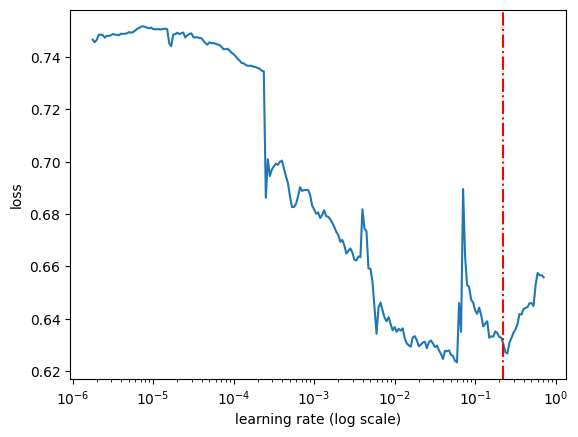

In [68]:
# axs = plot_loss()
# axs.axvline(x=lr_finder.get_best_lr(sma=20), c='r', linestyle='-.')

In [71]:
# #computing class weights
# def calculating_class_weights(y_true):
#     from sklearn.utils.class_weight import compute_class_weight
#     number_dim = np.shape(y_true)[1]
#     weights = np.empty([number_dim, 2])
#     for i in range(number_dim):
#         weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
#     return weights

In [81]:
# def get_weighted_loss(weights):
#     def weighted_loss(y_true, y_pred):
#         return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
#     return weighted_loss

In [58]:
#Compiling the model
from tensorflow.keras.optimizers import SGD, Adam

In [59]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.08)

In [58]:
# def custom_binary_loss(y_true, y_pred): 
#     # https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/backend.py#L4826
#     y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    
#     term_0 = (1 - y_true) * K.log(1 - y_pred + K.epsilon())  # Cancels out when target is 1 
#     term_1 = y_true * K.log(y_pred + K.epsilon()) # Cancels out when target is 0

#     return -K.mean(term_0 + term_1, axis=1)

In [60]:
"# Metrics"

#f1, recall, precision metrics, and jacard coefficient

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [61]:
# # compile keras model with defined optimizer, loss and metrics
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [62]:
# checkpoint
filepath = r'final year project thesis/trained models/VGG16_UNet_Building_7030_14LTP_A_0.08_BCE_CP_BS16_E100.hdf5'

In [63]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
callbacks_list = [checkpoint]

In [64]:
history = model.fit(X_train_, y_train,
                    batch_size=16,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test_, y_test),
                    callbacks=callbacks_list,
                    shuffle=True)

Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 0.6669 - acc: 0.6121 - f1_m: 0.5989 - precision_m: 0.6462 - recall_m: 0.6042 - jacard_coef: 0.3745 
Epoch 1: val_loss improved from inf to 31.45949, saving model to final year project thesis/trained models/VGG16_UNet_Building_7030_14LTP_A_0.08_BCE_CP_BS16_E100.hdf5
48/48 [==============================] - 1127s 24s/step - loss: 0.6669 - acc: 0.6121 - f1_m: 0.5989 - precision_m: 0.6462 - recall_m: 0.6042 - jacard_coef: 0.3745 - val_loss: 31.4595 - val_acc: 0.5793 - val_f1_m: 0.6922 - val_precision_m: 0.5445 - val_recall_m: 0.9667 - val_jacard_coef: 0.5086
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.6249 - acc: 0.6633 - f1_m: 0.7026 - precision_m: 0.6492 - recall_m: 0.7883 - jacard_coef: 0.4083 
Epoch 2: val_loss improved from 31.45949 to 2.66047, saving model to final year project thesis/trained models/VGG16_UNet_Building_7030_14LTP_A_0.08_BCE_CP_BS16_E100.hdf5
48/48 [========================

In [64]:
#Evaluating the model
score = model.evaluate(X_test_, y_test, verbose = 0) 
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])
print('Val F1 score:', score[2])
print('Val Precision:', score[3])
print('Val Recall:', score[4])
print('Val Jacard Coeff:', score[5])

Val Loss: 0.6143457889556885
Val Accuracy: 0.6319208741188049
Val F1 score: 0.5178854465484619
Val Precision: 0.7648488283157349
Val Recall: 0.39267438650131226
Val Jacard Coeff: 0.3623409867286682


In [65]:
#Save the model for future use
model.save(r'final year project thesis/trained models/VGG16_UNet_Building_13_20epochs.hdf5')

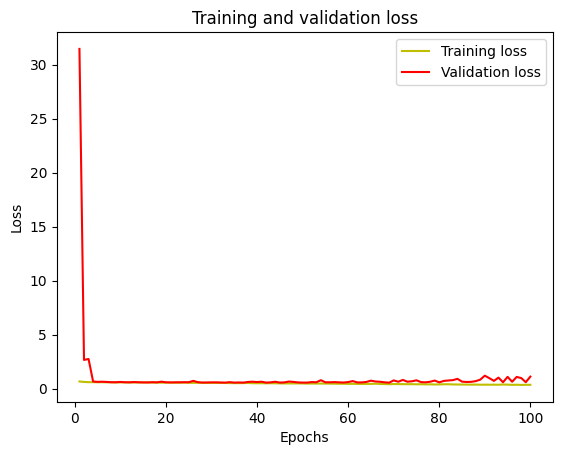

In [65]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

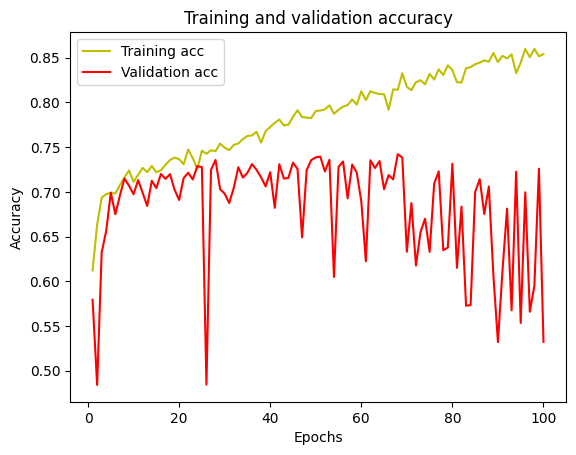

In [66]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

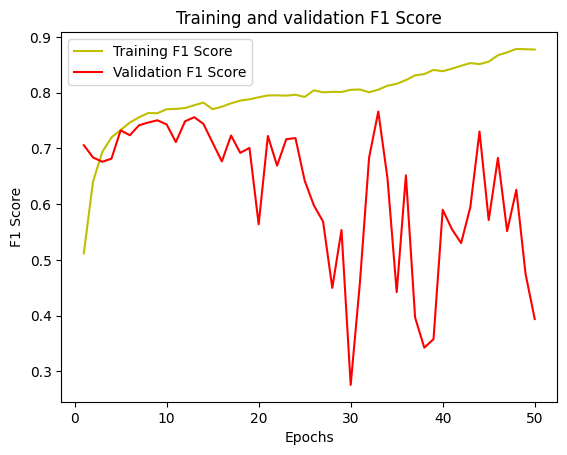

In [67]:
#plot the training and validation F1 Score at each epoch
f1_m = history.history['f1_m']
val_f1_m = history.history['val_f1_m']
plt.plot(epochs, f1_m, 'y', label='Training F1 Score')
plt.plot(epochs, val_f1_m, 'r', label='Validation F1 Score')
plt.title('Training and validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

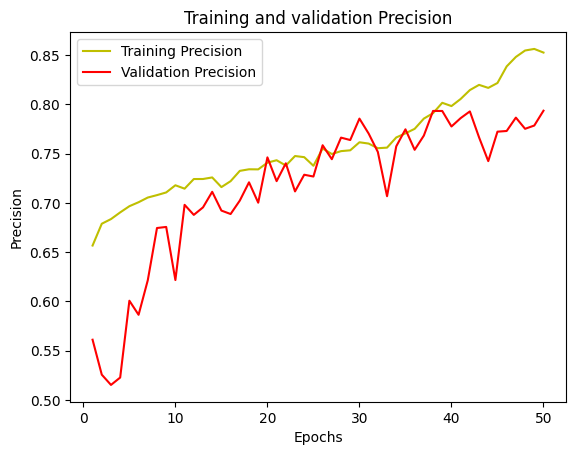

In [68]:
#plot the training and validation precision at each epoch
precision_m = history.history['precision_m']
val_precision_m = history.history['val_precision_m']
plt.plot(epochs, precision_m, 'y', label='Training Precision')
plt.plot(epochs, val_precision_m, 'r', label='Validation Precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

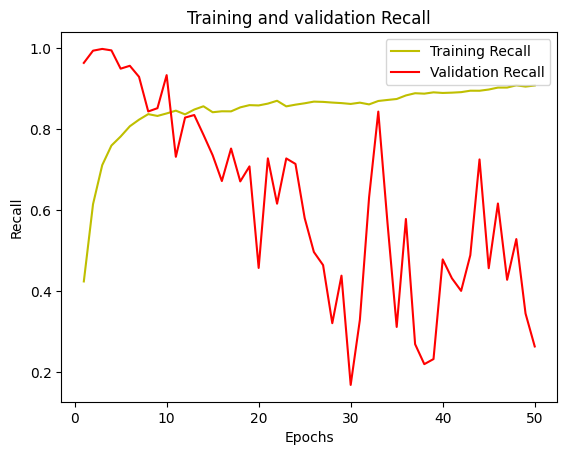

In [69]:
#plot the training and validation recall at each epoch
recall_m = history.history['recall_m']
val_recall_m = history.history['val_recall_m']
plt.plot(epochs, recall_m, 'y', label='Training Recall')
plt.plot(epochs, val_recall_m, 'r', label='Validation Recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

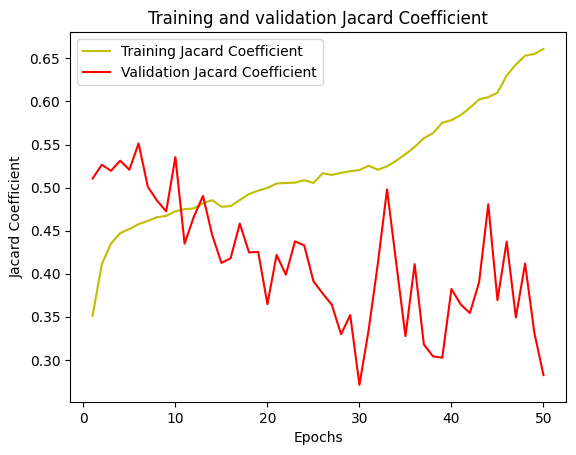

In [70]:
#plot the training and validation jacard coeff at each epoch
jacard_coef = history.history['jacard_coef']
val_jacard_coef = history.history['val_jacard_coef']
plt.plot(epochs, jacard_coef, 'y', label='Training Jacard Coefficient')
plt.plot(epochs, val_jacard_coef, 'r', label='Validation Jacard Coefficient')
plt.title('Training and validation Jacard Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Jacard Coefficient')
plt.legend()
plt.show()

In [72]:
# #Load previously saved model
# from keras.models import load_model
# model = load_model(r'final year project thesis/trained models/VGG16_UNet_Building_13_20epochs.hdf5', compile=False)

In [68]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'final year project thesis/trained models/VGG16_UNet_Building_7030_14LTP_A_0.08_BCE_CP_BS16_E100.hdf5', compile=False)

In [69]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

11/11 [==============================] - 95s 9s/step


In [70]:
from tensorflow.keras.metrics import MeanIoU

In [71]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.4301499


(1, 512, 512, 5)
1/1 [==============================] - 0s 420ms/step
(512, 512)


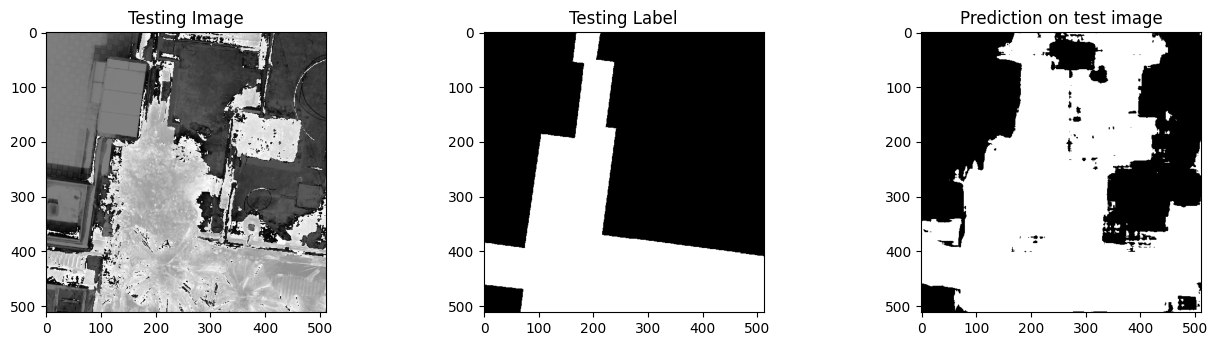

In [99]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()